In [2]:
import numpy as np

# Solving given equation using numpy => AX=B
# 3x + 6y − 5z = 12
# x − 3y + 2z = −2
# 5x − y + 4z = 10
# Numpy matrices are 2 dimensional while numpy array are N dimensional

A = np.matrix([
    [3, 6, -5],
    [1, -3, 2],
    [5,-1,4]
])
B = np.matrix([
    [12],[-2],[10]
])
X = A **(-1) * B
x = np.linalg.inv(A).dot(B)
print(X.shape, x.shape)

(3, 1) (3, 1)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,3*np.pi ,0.1)
y = np.sin(x)

plt.plot(x,y)

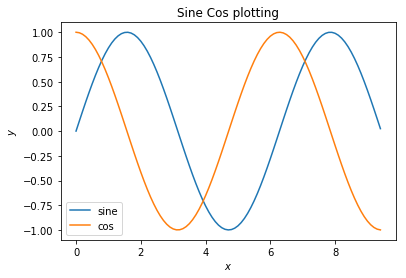

In [4]:

y_sin = np.sin(x)
y_cos = np.cos(x)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.title('Sine Cos plotting')
plt.legend(['sine', 'cos'])
plt.show()

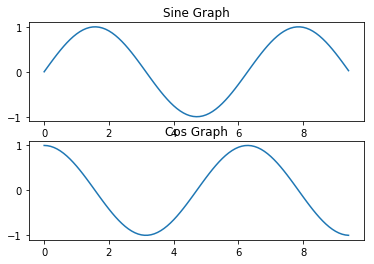

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,3*np.pi, 0.1)
y= np.sin(x)

plt.subplot(2,1,1)
plt.plot(x,y_sin)
plt.title('Sine Graph')

plt.subplot(2,1,2)
plt.plot(x,y_cos)
plt.title('Cos Graph')

plt.show()



## for more On Linear Algebre Visit the visit
## https://www.bogotobogo.com/python/python_numpy_matrix_tutorial.php

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

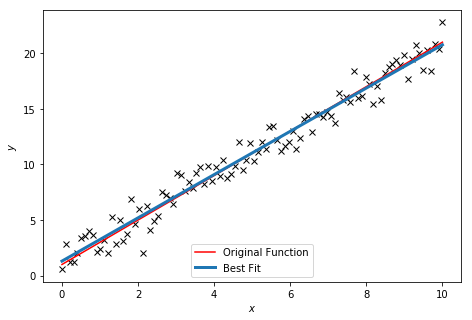

In [4]:
# implementing f = x* a + b
def func(x,a,b):
    return (x*a) + b

#Generating Clean Data
x =np.linspace(0,10,100)
y =func(x , 2 ,1)
# Adding Noise to data
yn = y + 0.9 * np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x,yn)

plt.figure(figsize=(7.5,5))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(x,yn,'kx')
plt.plot(x,y, label='Original Function', c='r')
plt.plot(x,func(x,popt[0],popt[1]), label='Best Fit', lw=3)
plt.legend(loc=8)
plt.show()

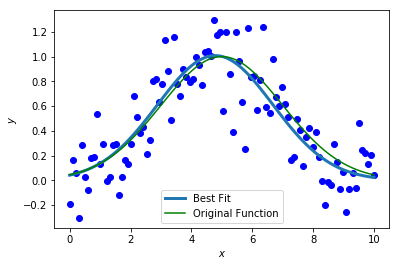

In [8]:
# implementing nonlinear Gaussian profile

def func2(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
x = np.linspace(0,10,100)
y = func2(x,1,5,2)

yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov= curve_fit(func2, x,yn)
plt.figure(figsize=(6,4))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(x,yn, 'bo')
plt.plot(x, func2(x,popt[0],popt[1],popt[2]), label='Best Fit', lw=3)
plt.plot(x,y,c='g',label='Original Function')
plt.legend(loc=8)
plt.show()

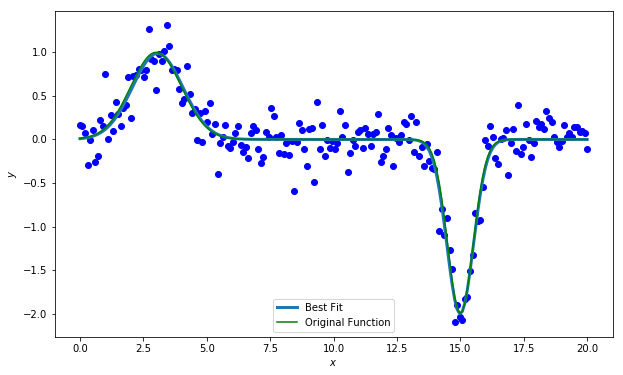

In [8]:
# Implementing Two Gaussian Model

def two_gaussian_model(x,a0,b0,c0,a1,b1,c1):
    return (a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2)) + a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2)))

x = np.linspace(0,20,200)
y = two_gaussian_model(x, 1, 3, 1, -2, 15, 0.5)
yn = y + 0.2* np.random.normal(size=len(x))

# Since we are fitting a more complex model,
# providing more guesses for fitting will lead to better results 

guesses= [1,3,1,1,15,1]
popt , pcov= curve_fit(two_gaussian_model, x, yn,p0=guesses)

plt.figure(figsize=(10,6))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(x,yn,'bo')
plt.plot(x,two_gaussian_model(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]), label='Best Fit', lw=3)
plt.plot(x,y, c='g', label='Original Function')
plt.legend(loc=8)
plt.show()

In [9]:
# Finding Intersection of two Functions

from scipy.optimize import fsolve
import numpy as np

# line = lambda x: x+4
def line(x):
    return x+3
solution= fsolve(line,-2)
print(solution)

[-3.]


[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ] [-0.36592269 -0.31886337 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


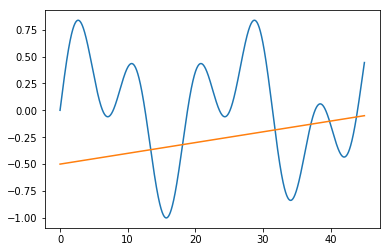

In [11]:
from scipy.optimize import fsolve
import numpy as np

def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)
def line(x):
    return (0.01 * x) - 0.5
def funky(x):
    return np.cos(x / 5) * np.sin(x / 2)

x = np.linspace(0,45,10000)
x0 = [15, 20, 30, 35, 40, 45]

result = findIntersection(funky, line, x0)

import matplotlib.pyplot as plt
plt.plot(x,funky(x))
plt.plot(x,line(x))
print(result, funky(result))

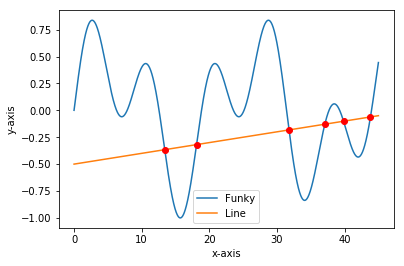

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,funky(x), label='Funky')
plt.plot(x,line(x), label='Line')
plt.plot(result,funky(result),'ro')
plt.legend(loc=8)
plt.show()

(1.296467785724373, 1.3977971863744082e-09)


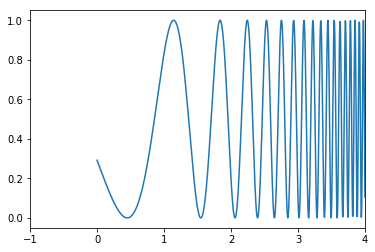

In [13]:
# Analytical Integration : limit 0 to 3, cos^2(e^x) dx

import numpy as np
from scipy.integrate import quad

def func(x):
    return np.cos(np.exp(x)) ** 2
solutions = quad(func,0,3)
print(solutions)
import matplotlib.pyplot as plt
plt.xlim(-1,4)
plt.plot(x, func(x))

/apps/PythonForDataScience/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/apps/PythonForDataScience/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


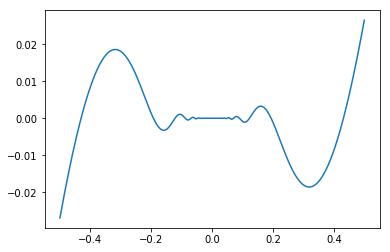

In [14]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    if (np.abs(x)<1e-10):
        res = x
    else:
        res = x*np.sin(1.0/x)
    return res

X = np.arange(-0.5,0.5,0.001)

#plot(X,f(X))

def F(x):
    res = np.zeros_like(x)
    for i,val in enumerate(x):
        y,err = integrate.quad(f,0,val)
        res[i]=y
    return res

plt.plot(X,F(X))

In [15]:
# Numerical Integration, where we are given data instead of known equation and numerical integration is needed
import numpy as np
from scipy.integrate import quad, trapz

def fake_y(x):
    return np.sin(x) * np.cos(x ** 2) + 1

# setting up fake data 
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
y = fake_y(x)
f_solution = quad(fake_y,0,5)
d_solution= trapz(y, x=x)
print('fsolution = ' + str(f_solution[0]))
print('dsolution = ' + str(d_solution))
print('The difference is ' + str(np.abs(f_solution[0] - d_solution)))

fsolution = 5.100345067540932
dsolution = 5.067217312311661
The difference is 0.033127755229270583
